# Bite Size Bayes

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

## Review

[In the previous notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/04_dice.ipynb) I presented Theorem 4, which is a way to compute the probability of a disjunction (`or` operation) using the probability of a conjunction (`and` operation).

$P(A ~or~ B) = P(A) + P(B) - P(A ~and~ B)$

Then we used it to show that the sum of the unnormalized posteriors is the total probability of the data, which is why the Bayes table works.

We saw several examples involving dice, and I used them to show how prediction and inference are related: the Bayes table actually solves the prediction problem on the way to solving the inference problem.

## Bayesville

In this notebook we'll consider a famous example where Bayes's Theorem brings clarity to a confusing topic: medical testing.

Joe Blitzstein explains the scenario in this video from Stat110x at HarvardX.

(You might have to run the following cell to see the video.)

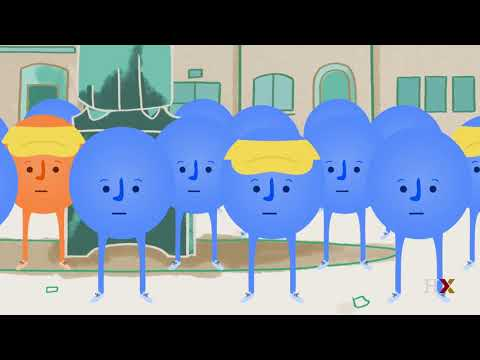

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('otdaJPVQIgg')

I'll paraphase the problem posed in the video: 

> In Bayesville, 1% of the population has an undiagnosed medical condition.  Jimmy gets tested for the condition and the test comes back positive; that is, the test says Jimmy has the condition.  
>
> The test is 95% accurate, which means
>
> * If you give the test to someone with the condition, the probability is 95% that the test will be positive, and 
>
> * If you give it to someone who does not have the condition, the probability is 95% that the test will be negative.
>
> What is the probability that Jimmy actually has the condition?  

Because the test is 95% accurate, it is tempting to say that the probability is 95% that the test is correct and Jimmy has the condition.

But that is wrong.  Or maybe I should say it's the right answer to a different question.  95% is the probability of a positive test, given a patient with the condition.  But that's not what the question asked, or what Jimmy wants to know.

To Jimmy, the important question is the probability he has the condition, given a positive test.  As we have seen, and as Joe explains in the video:

$P(A|B) ≠ P(B|A)$

We can use a Bayes table to answer Jimmy's question correctly.

## Bayes table

I'll use two strings to represent the hypotheses: `condition` and `no condition`.

The prior for `condition` is the probability a random citizen of Bayesville has the condition, which is 1%.

The prior for `no condition` is the probability that a random citizen does not have the disease, which is 99%.

Let's put those values into a Bayes table.

In [2]:
import pandas as pd

table = pd.DataFrame(index=['condition', 'no condition'])
table['prior'] = 0.01, 0.99
table

,prior
condition,0.01
no condition,0.99


The data is the positive test, so the likelihoods are:

* The probability of a correct positive test, given the condition, which is 95%.

* The probability of an incorrect positive test, given no condition, which is 5%.

In [3]:
table['likelihood'] = 0.95, 0.05
table

,prior,likelihood
condition,0.01,0.95
no condition,0.99,0.05


Once we have priors and likelihoods, the remaining steps are always the same.  We compute the unnormalized posteriors:

In [4]:
table['unnorm'] = table['prior'] * table['likelihood']
table

,prior,likelihood,unnorm
condition,0.01,0.95,0.0095
no condition,0.99,0.05,0.0495


And the total probability of the data.

In [5]:
prob_data = table['unnorm'].sum()
prob_data

0.059000000000000004

Then divide through to get the normalized posteriors.

In [6]:
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
condition,0.01,0.95,0.0095,0.161017
no condition,0.99,0.05,0.0495,0.838983


The posterior for `condition` is substantially higher than the prior, so the positive test is evidence in favor of `condition`.

But the prior is small and the evidence is not strong enough to overcome it; despite the positive test, the probability that Jimmy has the condition is only about 16%.

Many people find this result surprising and some insist that the probability is 95% that Jimmy has the condition.

The mistake they are making is called the [base rate fallacy](https://en.wikipedia.org/wiki/Base_rate_fallacy) because it ignores the "base rate" of the condition, which is the prior.

## Put a function on it

At this point you might be sick of seeing the same six lines of code over and over, so let's put them in a function where you will never have to see them again.

In [7]:
def make_bayes_table(hypos, prior, likelihood):
    """Make a Bayes table.
    
    hypos: sequence of hypotheses
    prior: prior probabilities
    likelihood: sequence of likelihoods
    
    returns: DataFrame
    """
    table = pd.DataFrame(index=hypos)
    table['prior'] = prior
    table['likelihood'] = likelihood
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return table

This function takes three parameters:

* `hypos`, which should be a sequence of hypotheses.  You can use almost any type to represent the hypotheses, including string, `int`, and `float`.

* `prior`, which is sequence of prior probabilities, $P(H)$  for each $H$.

* `likelihood`, which is a sequence of likelihoods, $P(D|H)$  for each $H$.

All three sequences should be the same length.

Here's a solution to the previous problem using `make_bayes_table`:

In [8]:
hypos = ['condition', 'no condition']
prior = 0.01, 0.99
likelihood = 0.95, 0.05

make_bayes_table(hypos, prior, likelihood)

,prior,likelihood,unnorm,posterior
condition,0.01,0.95,0.0095,0.161017
no condition,0.99,0.05,0.0495,0.838983


**Exercise:** Suppose we take the same test to another town, called Sickville, where the base rate of the disease is 10%, substantially higher than in Bayesville.  If a citizen of Sickville tests positive, what is the probability that they have the condition?

Use `make_bayes_table` to compute the result.

In [9]:
# Solution

hypos = ['condition', 'no condition']
prior = 0.1, 0.9
likelihood = 0.95, 0.05

make_bayes_table(hypos, prior, likelihood)

,prior,likelihood,unnorm,posterior
condition,0.1,0.95,0.095,0.678571
no condition,0.9,0.05,0.045,0.321429


With a higher base rate, the posterior probability is substantially higher.

**Exercise:** Suppose we go back to Bayesville, where the base rate is 1%, with a new test that is 99.5% accurate.

If a citizen of Bayesville tests positive with the new test, what is the probability they have the condition?

Use `make_bayes_table` to compute the result.

In [10]:
# Solution

hypos = ['condition', 'no condition']
prior = 0.01, 0.99
likelihood = 0.995, 0.005

make_bayes_table(hypos, prior, likelihood)

,prior,likelihood,unnorm,posterior
condition,0.01,0.995,0.00995,0.667785
no condition,0.99,0.005,0.00495,0.332215


With an accuracy of 99.5%, the positive test provides stronger evidence, so it is able to overcome the small prior.

## The Elvis problem

Here's a problem from [*Bayesian Data Analysis*](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth).  What is the probability that Elvis was an identical twin?

For background information, I used data from the
U.S. Census Bureau, [Birth, Stillbirth, and Infant Mortality Statistics for the Continental United States, the Territory of Hawaii, the Virgin Islands 1935](https://www.cdc.gov/nchs/data/vsushistorical/birthstat_1935.pdf) to estimate that in 1935, about 1/3 of twins were identical.

**Exercise:** Use this base rate and a Bayes table to compute the probability that Elvis was an identical twin.

Hint: Because identical twins have the same genes, they are almost always the same sex.

In [11]:
# Solution

hypos = ['identical', 'fraternal']
prior = 1/3, 2/3
likelihood = 1, 0.5

make_bayes_table(hypos, prior, likelihood)

,prior,likelihood,unnorm,posterior
identical,0.333333,1.0,0.333333,0.5
fraternal,0.666667,0.5,0.333333,0.5


## Summary

In this notebook, we used Bayes's Theorem, in the form of a Bayes table, to solve an important problem: interpreting the result of a medical test correctly.

Many people, including many doctors, get this problem wrong, with bad consequences for patients.  Now that you know about the "base rate fallacy", you will see that it appears in many other domains, not just medicine.

Finally, I presented the Elvis problem, which I hope is a fun way to apply what you have learned so far.  If you like the Elvis problem, you might enjoy [this notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/elvis.ipynb) where I dig into it a little deeper.

[In the next notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/06_pmf.ipynb) I'll introduce the probability mass function (PMF) and we'll use it to solve new versions of the cookie problem and the dice problem.